<a href="https://colab.research.google.com/github/brahimje/DLProjects/blob/master/Introduction/computer_vision_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Fashion dataset
**Build neural network to recognize different items of clothing**




In [16]:
import tensorflow as tf
print(tf.__version__)

2.8.2



The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images.

This dataset is available directly in the tf.keras.datasets API



```
Label 	Description
0 	    T-shirt/top
1 	    Trouser
2 	    Pullover
3     	Dress
4     	Coat
5     	Sandal
6     	Shirt
7     	Sneaker
8     	Bag
9 	    Ankle boot
```




In [17]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

`load_data()` give two tuples with two lists each (training and testing)

In [18]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Let's print a training image (both as an image and a numpy array), and a training label to see.

LABEL:9

Image PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

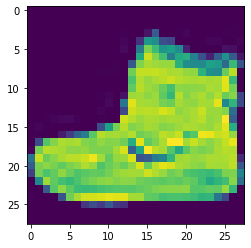

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Index of training data between 0 and 59999
index = 0;

# Number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL:{training_labels[index]}')
print(f'\nImage PIXEL ARRAY:\n {training_images[index]}')

#Visualise the image
plt.imshow(training_images[index])

`normalization` scale all values to between 0 and 1 (usally between 0 and 255) in neural network especially in image processing.

In [20]:
# Normalize the pixel values of the train and test image
training_images = training_images / 255
test_images = test_images / 255

Training and testing? to evaluate with test images how good it would be at classifying values learned with training images.

In [21]:
# Build classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


`Sequential`: That defines a sequence of layers in the neural network.

`Flatten`: Turns 28x28 pixel matrix into a 1-dimensional array.

`Dense`: Adds a layer of neurons
Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

`ReLU`: Passes values 0 or greater to the next layer in the network.

if x > 0: 
  return x
else: 
  return 0

`Softmax`: takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth.


In [22]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax functions: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

output of softmax functions: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [23]:
# Build the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3734 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8927


In [24]:
# Evaluate the model on unseen data
model.evaluate(training_images, training_labels)
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8763


[0.3512413203716278, 0.8762999773025513]

---
**Other Exercices**

In [25]:
# the probability that this item is each of the 10 classes
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[6.5806654e-07 1.4552171e-07 8.8567393e-09 9.6430668e-08 2.8422997e-07 3.7748506e-03 1.1009017e-06 1.0911342e-02 6.9523016e-06 9.8530453e-01]
9


* Try to test the same model with 512 and 1024 neurons in dense layer

* Training takes longer, but is more accurate.adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly! 

* What would happen if you remove the `Flatten()` layer.You get an error about the shape of the data. It may seem vague right now, but it ***reinforces the rule of thumb that the first layer in your network should be the same shape as your data***. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to `'flatten'` that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the `Flatten()` layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us. 

* Training the network with 5. You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for.

* What will happen if you add another layer between the one with 512 and the final layer with 10.
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers), extra layers are often necessary.  

* Consider the impact of training for more or less epochs. Why do you think that would be the case?
    Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
    Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of model.evaluate() didn't improve much. It can even be slightly worse.
This is a side effect of something called `overfitting` which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

*  What would be the impact of removing Normalized lines from 0-255 to 0-1? More calculus and process.


In [37]:
from tensorflow.python import metrics
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

#training_images = training_images/255.0 # Experiment with removing this line
#test_images = test_images/255.0 # Experiment with removing this line

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # Remove this get an error
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5) # Experiment with the number of epochs

print('Evaluate:')
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 4.2574 - accuracy: 0.7655
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5417 - accuracy: 0.8129
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5174 - accuracy: 0.8193
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5162 - accuracy: 0.8245
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4994 - accuracy: 0.8287
Evaluate:
313/313 [==============================] - 1s 2ms/step - loss: 0.5917 - accuracy: 0.8151
[1.5717822e-15 3.7781220e-17 2.3687229e-23 3.0975485e-17 6.6794766e-25 1.2399586e-02 4.2964823e-19 3.9893147e-01 5.6236643e-10 5.8866894e-01]
9


* Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...



1. Defining a class that inherits the `tf.keras.callbacks.Callback` base class. define available methods to set where the callback will be executed. For instance below, you will use the `on_epoch_end()` method to check the loss at each training epoch.
2. Train the model. To set the callback, simply set the callbacks parameter to the myCallback instance you declared before. Run the cell below and observe what happens.




In [40]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # Check accuracy
    if(logs.get('accuracy') >= 0.9):

      # Stop if threshold is met
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with a callback
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4784 - accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3611 - accuracy: 0.8702
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3237 - accuracy: 0.8816
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3010 - accuracy: 0.8883
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2808 - accuracy: 0.8957
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.2661 - accuracy: 0.9006
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2662 - accuracy: 0.9006
